In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = sns.load_dataset('penguins')

# 4.2.0
---

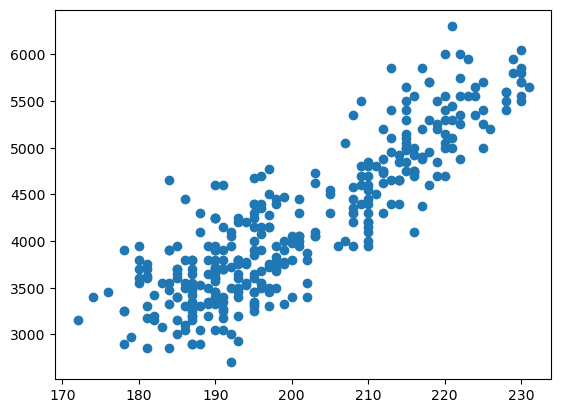

In [3]:

# 산점도 그리기
# plt.scatter(x축, y축)
plt.scatter(df['flipper_length_mm'], df['body_mass_g'])
plt.show()

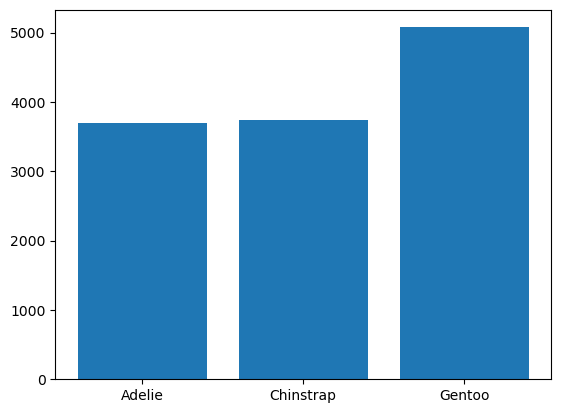

In [4]:

# 막대 그래프 그리기
# species별로 그룹을 묶은 후 'body_mass_g' 열의 평균을 구하기
df_group = df.groupby('species')['body_mass_g'].mean().reset_index()
# plt.bar(x=x축, height=높이 정보)
plt.bar(x=df_group['species'], height=df_group['body_mass_g'])
plt.show()

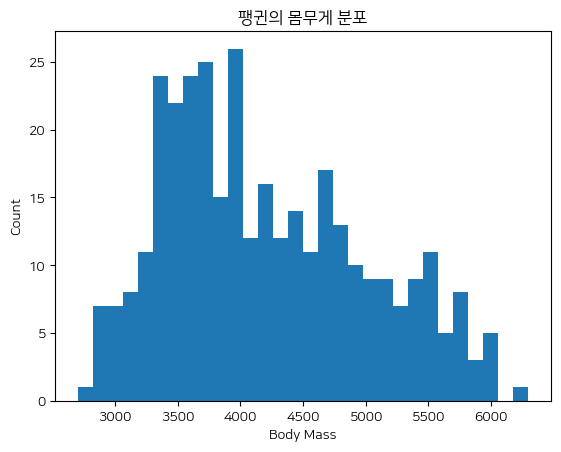

In [5]:
# 히스토그램 그리기
# matplotlib은 한글 폰트를 지원 X, 한글이 깨지지 않도록 'NanumSquare' 폰트 지정
plt.rc('font', family='NanumSquare')
# plt.hist(나타내고자 하는 데이터, bins=히스토그램을 몇 개의 구간으로 나눌지 입력)
plt.hist(df['body_mass_g'], bins=30)
# x, y축 레이블 설정
plt.xlabel('Body Mass')
plt.ylabel('Count')
# 제목 설정
plt.title('팽귄의 몸무게 분포')
plt.show()


In [6]:
# https://fred.stlouisfed.org/series/UNRATE
df_unrate = pd.read_csv(
    'https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1320&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=UNRATE&scale=left&cosd=1948-01-01&coed=2024-10-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=3&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2024-11-16&revision_date=2024-11-16&nd=1948-01-01'
)
df_unrate.head()

,DATE,UNRATE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5


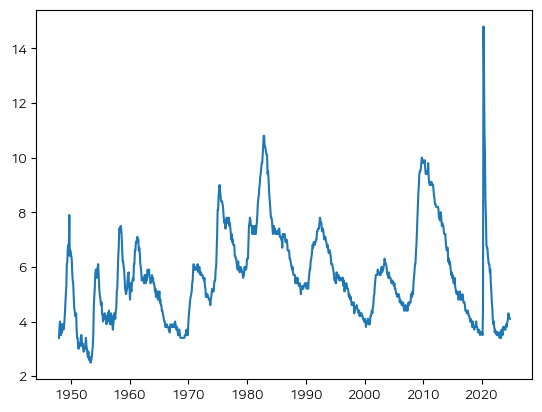

In [7]:
df_unrate['DATE'] = pd.to_datetime(df_unrate['DATE'])

# 선 그래프 출력
# plt.plot(x축, y축)
plt.plot(df_unrate['DATE'], df_unrate['UNRATE'])
plt.show()

# 4.2.1: 한번에 여러 그래프 나타내기
---

## stateless 방법을 이용해 그래프 나타내기 - figure와 axis를 직접 만들기

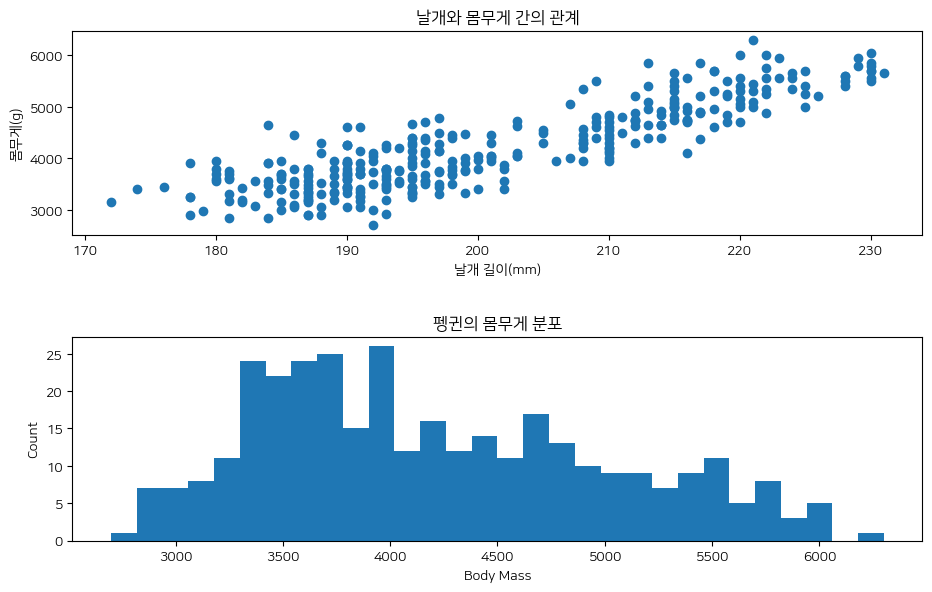

In [17]:
# figure 내에 2행 1열로 2개의 axes 객체를 만들기, figsize=(10, 6): 가로 10, 세로 6으로 figure 길이 정하기
fig, axes = plt.subplots(2, 1, figsize=(10, 6))

# 첫 번째 그림 - axes[0]
axes[0].scatter(df['flipper_length_mm'], df['body_mass_g'])
axes[0].set_xlabel('날개 길이(mm)')
axes[0].set_ylabel('몸무게(g)')
axes[0].set_title('날개와 몸무게 간의 관계')

# 두 번째 그림 - axes[1]
axes[1].hist(df['body_mass_g'], bins=30)
axes[1].set_xlabel('Body Mass')
axes[1].set_ylabel('Count')
axes[1].set_title('펭귄의 몸무게 분포')

# 간격 조정
plt.subplots_adjust(left=0.1,
                    right=0.95,
                    bottom=0.1,
                    top=0.95,
                    wspace=0.5,
                    hspace=0.5)
plt.show()


## stateful 방법을 이용해 그래프 나타내기 - 현재 axes 지정 후 제작

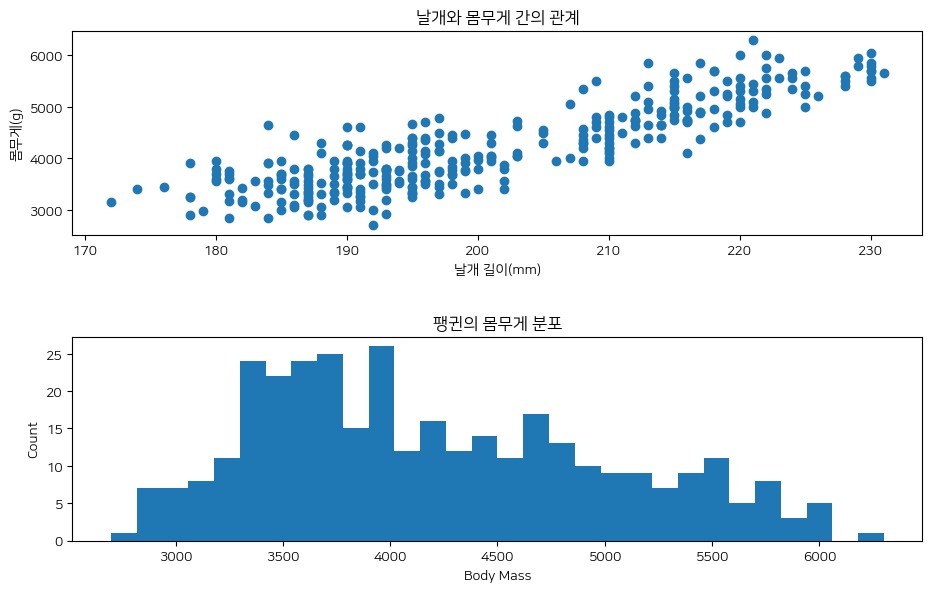

In [18]:
plt.figure(figsize=(10, 6))

# 첫 번쨰 그림
plt.subplot(2, 1, 1)
plt.scatter(df['flipper_length_mm'], df['body_mass_g'])
plt.xlabel('날개 길이(mm)')
plt.ylabel('몸무게(g)')
plt.title('날개와 몸무게 간의 관계')

# 두 번째 그림
plt.subplot(2, 1, 2)
plt.hist(df['body_mass_g'], bins=30)
plt.xlabel('Body Mass')
plt.ylabel('Count')
plt.title('팽귄의 몸무게 분포')

# 간격 조정
plt.subplots_adjust(left=0.1,
                    right=0.95,
                    bottom=0.1,
                    top=0.95,
                    wspace=0.5,
                    hspace=0.5)
plt.show()

# 4.3 판다스 패키지를 이용한 시각화
---

In [19]:
df = sns.load_dataset('diamonds')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


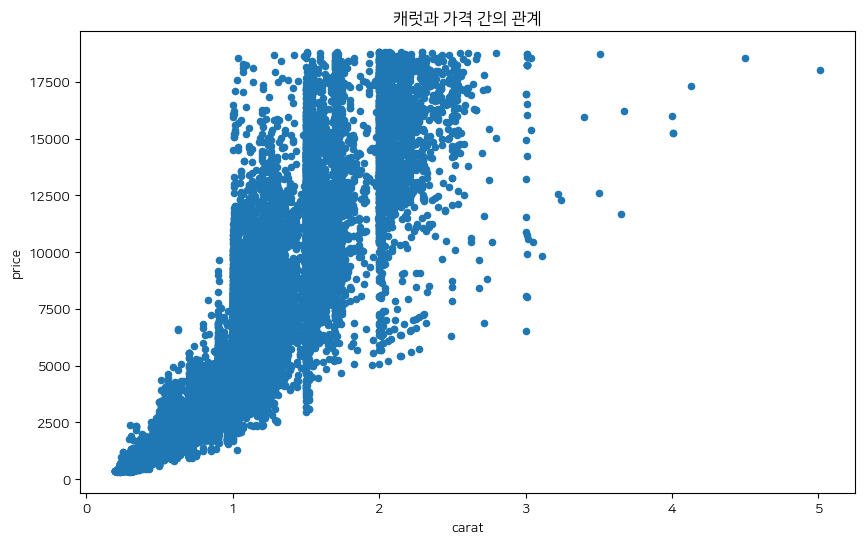

In [20]:
plt.rc('font', family='NanumSquare')
df.plot.scatter(x='carat', y='price', figsize=(10, 6), title='캐럿과 가격 간의 관계')
plt.show()

<Axes: xlabel='carat', ylabel='price'>

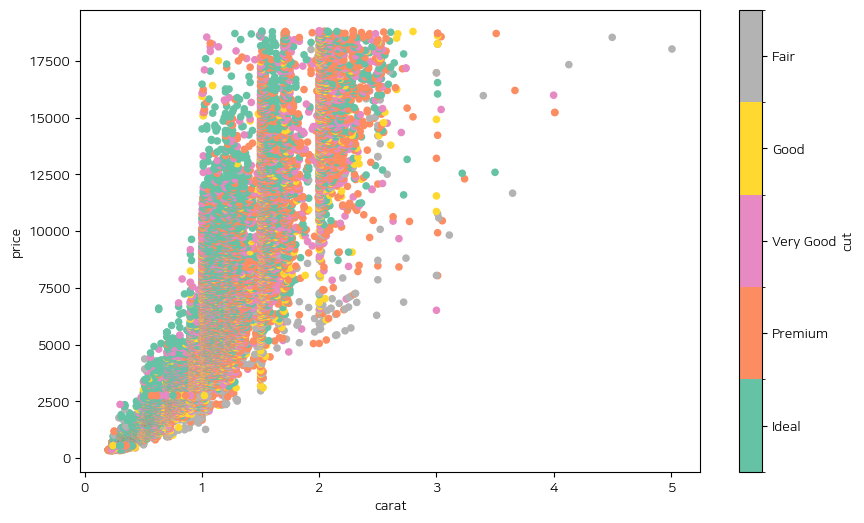

In [22]:
# c 인자에 색을 구분하고 싶은 열 입력 후, cmap에 파레트 지정
df.plot.scatter(x='carat', y='price', c='cut', cmap='Set2', figsize=(10, 6))


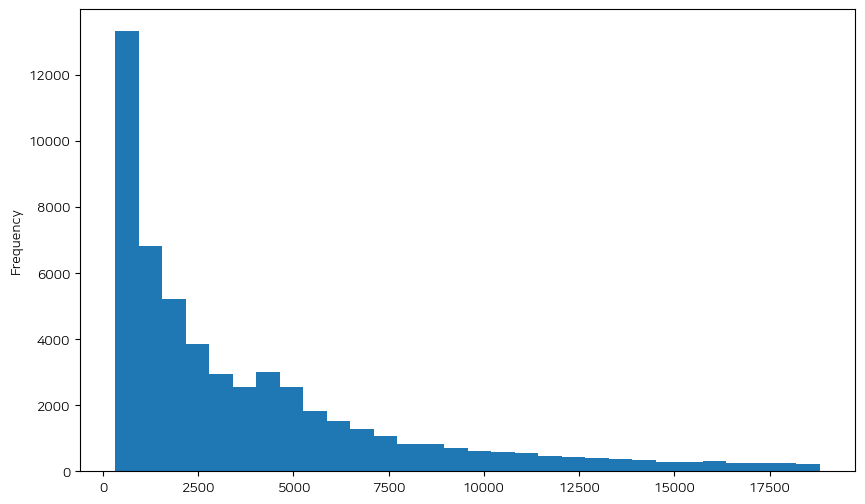

In [23]:
df['price'].plot.hist(figsize=(10,6), bins=30)
plt.show()

/tmp/ipykernel_17482/415763697.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('color')['carat'].mean().plot.bar(figsize=(10,6))


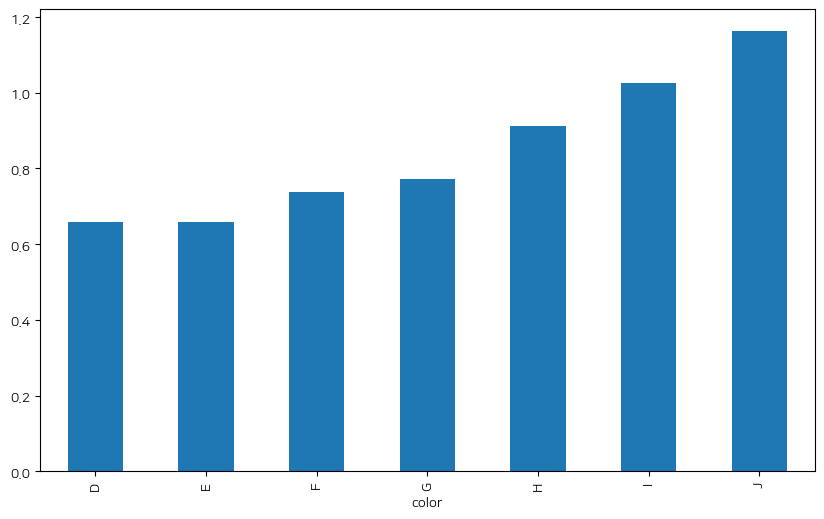

In [24]:
# 분석과 시각화 동시 실행
df.groupby('color')['carat'].mean().plot.bar(figsize=(10,6))
plt.show()

# 4.4 seaborn 패키지를 이용한 시각화
---

In [26]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


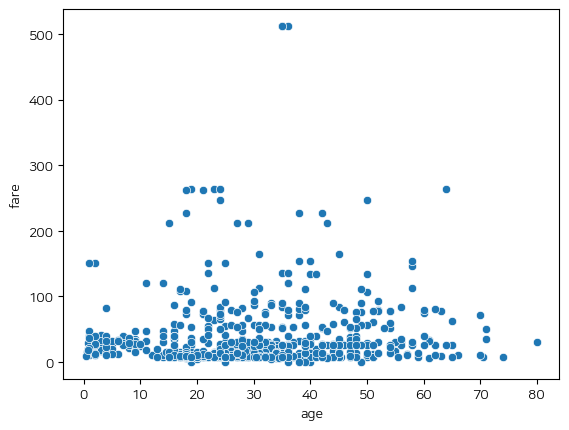

In [ ]:
# sns.scatterplot(data=사용하고자 하는 데이터, x=x축 정보, y=y축 정보)

sns.scatterplot(data=df, x='age', y='fare')
plt.show()

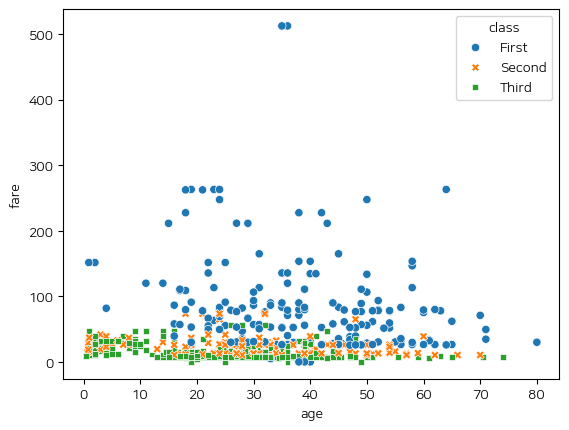

In [ ]:
# hue: 해당 그룹별 색을 다르게(class별 색 다르게), style: 해당 그룹별 모양을 다르게(class별 모양 다르게)
sns.scatterplot(data=df, x='age', y='fare', hue='class', style='class')
plt.show()

In [30]:
df_pivot = df.pivot_table(index='class',
                          columns='sex',
                          values='survived',
                          aggfunc='mean')
df_pivot

/tmp/ipykernel_17482/1644463895.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_pivot = df.pivot_table(index='class',


sex,female,male
class,,
First,0.968085,0.368852
Second,0.921053,0.157407
Third,0.500000,0.135447


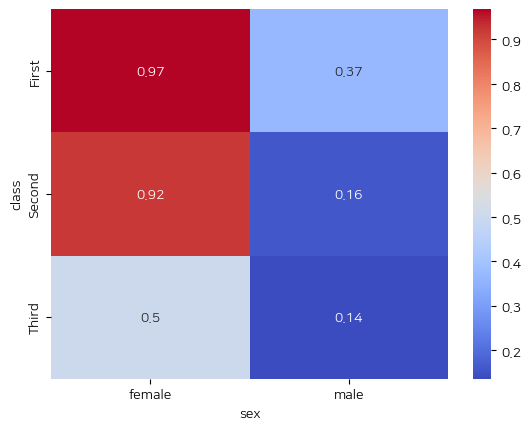

In [ ]:
# sns.heatmap(df_pivot, annot=True - 데이터 값 표시 여부, cmap='coolwarm' - 팔레트)

sns.heatmap(df_pivot, annot=True, cmap='coolwarm')
plt.show()

# 4.4.1 한 번에 여러 개의 그래프 나타내기
---

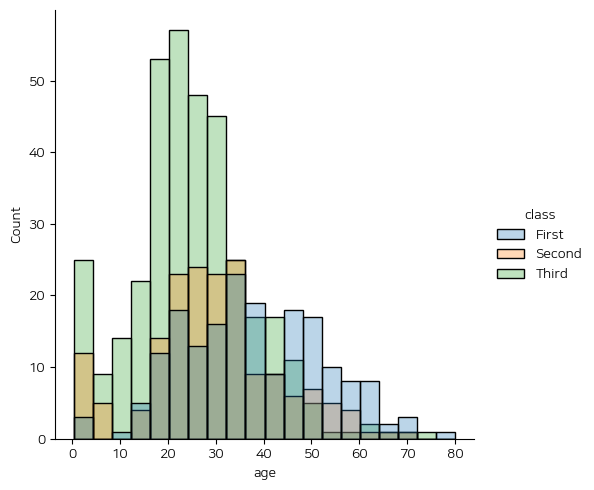

In [33]:
# sns.displot(data=df, x='age', hue='class', kind='hist', alpha=0.3 - 투명도 조절)

sns.displot(data=df, x='age', hue='class', kind='hist', alpha=0.3)
plt.show()

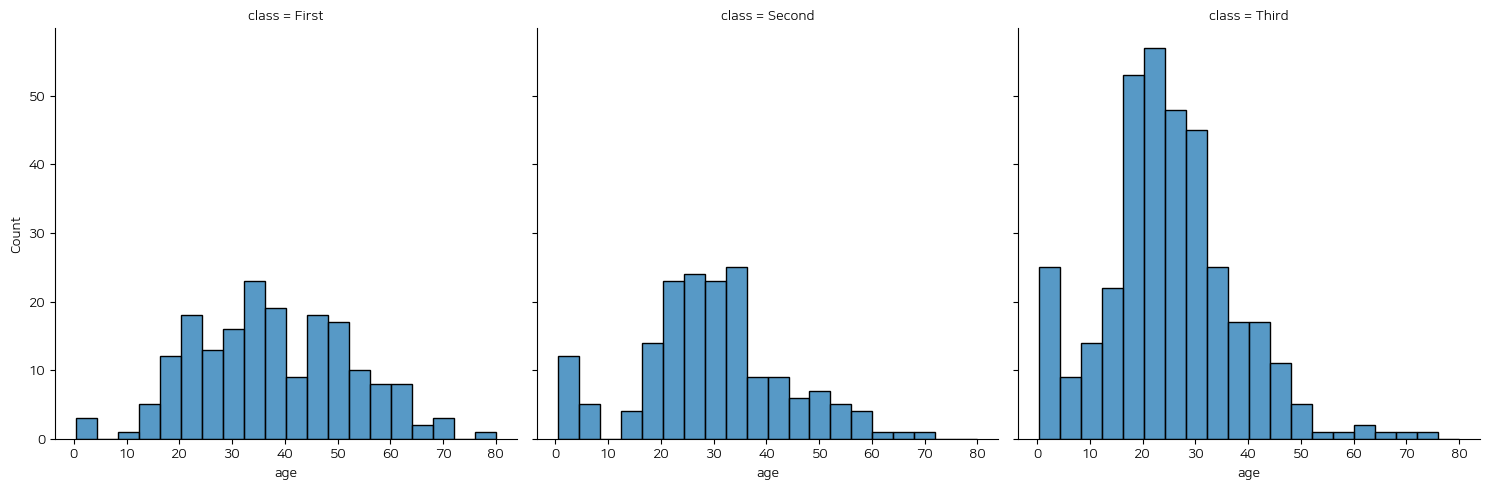

In [ ]:
# col 인자에 특정 열을 입력 시, 해당 열을 기준으로 그래프가 열 방향으로 분할되어 표현 - facetgrid가 적용됨
sns.displot(data=df, x='age', col='class', kind='hist')
plt.show()

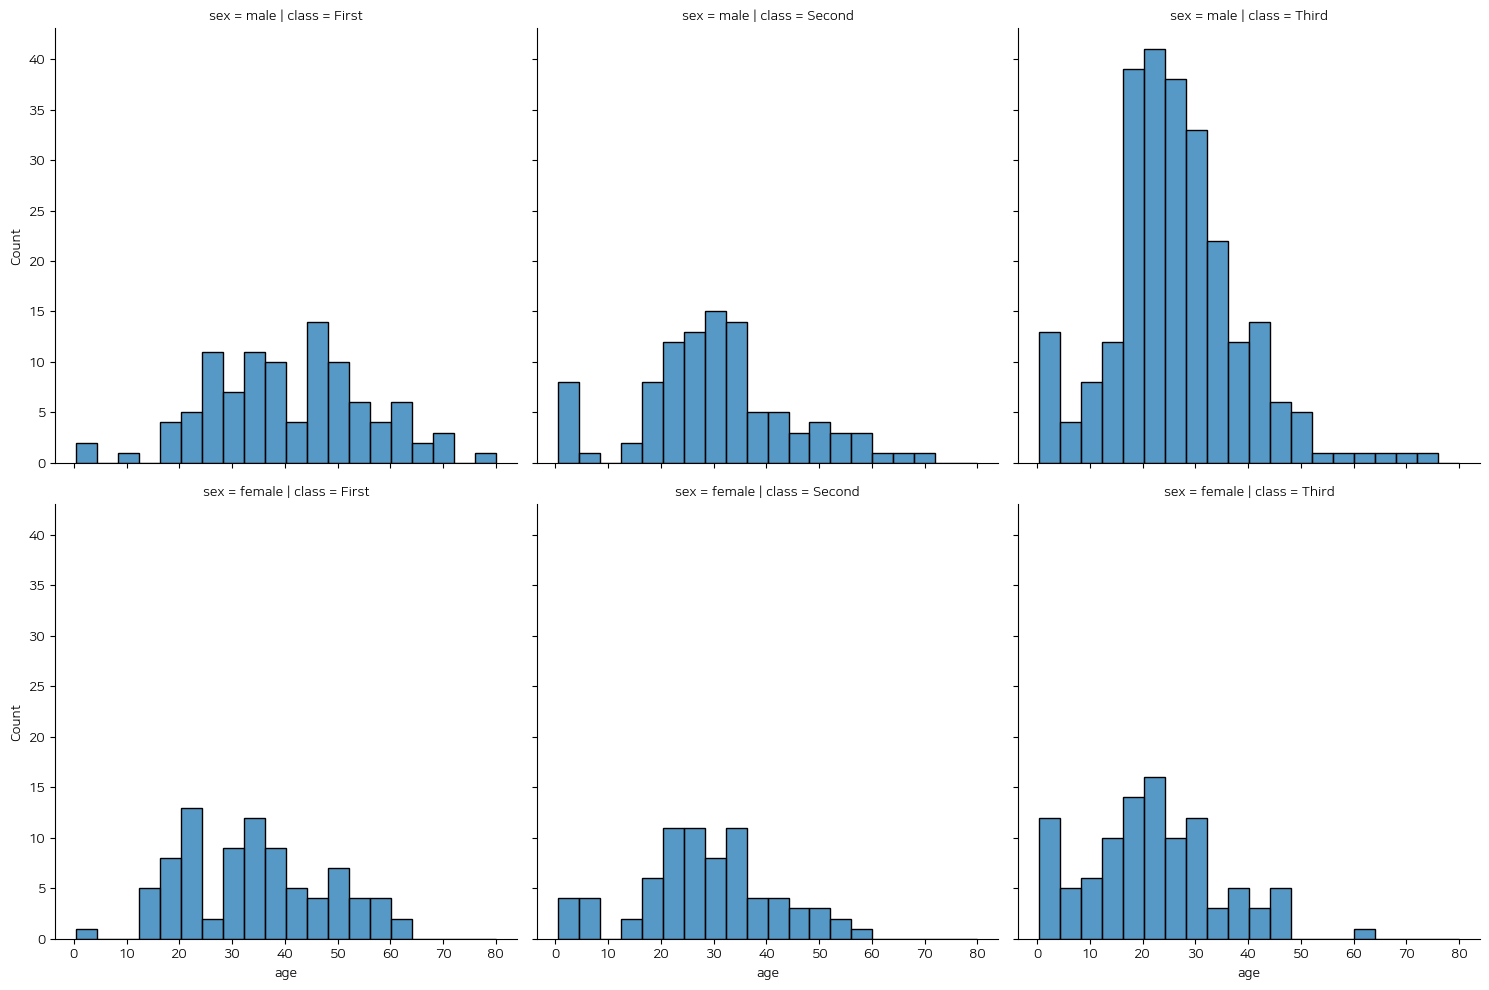

In [35]:
# 가로로도 그래프 분할 가능 - row 인자에 특정 열 삽입
sns.displot(data=df, x='age', col='class', row='sex', kind='hist')
plt.show()

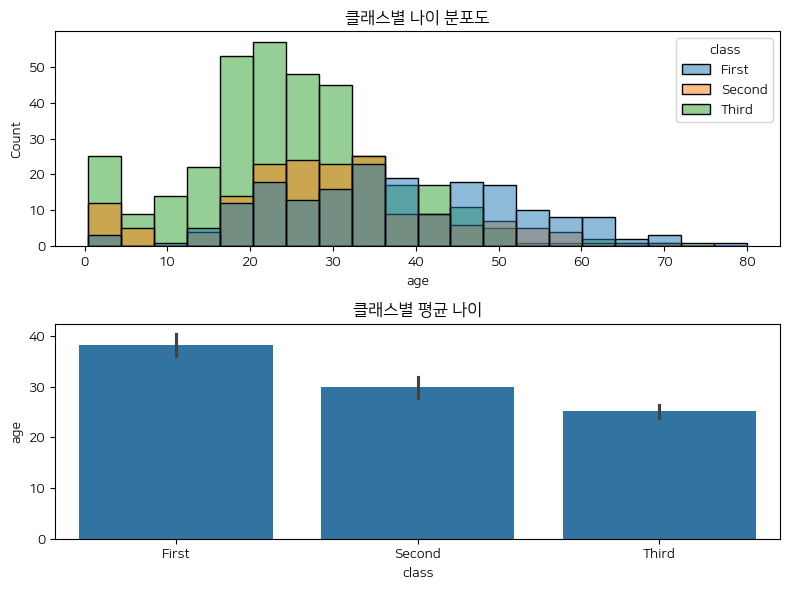

In [ ]:
# axis-level함수인 histplot()로는 facetgrid를 할 수 없음
# matplotlib 패키지를 이용하는 방법과 거의 비슷하게 사용

plt.rc('font', family='NanumSquare')

g, axes = plt.subplots(2, 1, figsize=(8, 6))

sns.histplot(data=df, x='age', hue='class', ax=axes[0])
sns.barplot(data=df, x='class', y='age', ax=axes[1])

axes[0].set_title('클래스별 나이 분포도')
axes[1].set_title('클래스별 평균 나이')

g.tight_layout() # 그래프 간 여백 조정
plt.show()
